# 3. Modelamiento y evaluación del modelo

In [192]:
# Importamos las librerias a utilizar
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; #plt.style.use('ggplot')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score 
from sklearn import metrics
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, cross_validate
import warnings
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from math import sqrt
warnings.filterwarnings('ignore')
import mglearn # mglearn es un paquete que contiene funciones para graficar y datos de ejemplo 

Cargar la base de datos preparada en la fase EDA

In [193]:
# Cargamos el dataset
df = pd.read_csv('../Analisis de mercado/df_model.csv')


In [194]:
df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,gama,Marca_Audi,Marca_BMW,Marca_Buick,Marca_Chevrolet,Marca_Dodge,Marca_Honda,Marca_Isuzu,Marca_Jaguar,Marca_Mazda,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Plymouth,Marca_Renault,Marca_Saab,Marca_Subaru,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Modelo_100ls,Modelo_1131 deluxe sedan,Modelo_12tl,Modelo_144ea,Modelo_145e (sw),Modelo_244dl,Modelo_245,Modelo_246,Modelo_304,Modelo_4000,Modelo_411 (sw),Modelo_5 gtl,Modelo_5000,Modelo_504,Modelo_504 (sw),Modelo_505s turbo diesel,Modelo_604sl,Modelo_626,Modelo_99e,Modelo_99gle,Modelo_99le,Modelo_D-Max,...,Modelo_rampage,Modelo_regal sport coupe (turbo),Modelo_rogue,Modelo_rx-4,Modelo_rx-7 gs,Modelo_rx2 coupe,Modelo_rx3,Modelo_satellite custom (sw),Modelo_skyhawk,Modelo_skylark,Modelo_starlet,Modelo_stelvio,Modelo_super beetle,Modelo_teana,Modelo_tercel,Modelo_titan,Modelo_trezia,Modelo_tribeca,Modelo_type 3,Modelo_valiant,Modelo_vega 2300,Modelo_versa,Modelo_x3,Modelo_xf,Modelo_z4,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.4,141.1,60.3,1488,61,2.91,48,5151.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,94.5,155.9,63.6,1874,90,3.03,70,6295.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,94.5,158.8,63.6,1909,90,3.03,70,6575.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,93.7,157.3,63.8,1876,90,2.97,68,5572.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,93.7,157.3,63.8,1876,90,2.97,68,6377.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [195]:
print(df.columns)

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'gama', 'Marca_Audi',
       ...
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object', length=174)


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Columns: 174 entries, wheelbase to fuelsystem_spfi
dtypes: float64(5), int64(169)
memory usage: 280.2 KB


In [197]:
df1=df.copy()

## 1. Modelos predictivos:

Separen el dataset en X, y (variable objetivo)

In [198]:
X = df1.drop(['price','gama'],axis=1)
y = df1['price']

Dividimos el conjunto de datos

In [199]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Estandarizamos los datos

In [200]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Escalar los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Usar la transformación ajustada en los datos de prueba
# cargamos los datos y los estandarizamos

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [201]:
np.shape(X)

(206, 172)

In [202]:
np.shape(X_scaled)

(206, 172)

Aplicamos PCA (Análisis de componentes principales) para reducir la dimensionalidad

In [203]:
pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)  # Ajustar y transformar los datos de entrenamiento
X_test_pca = pca.transform(X_test_scaled)  # Transformar los datos de prueba

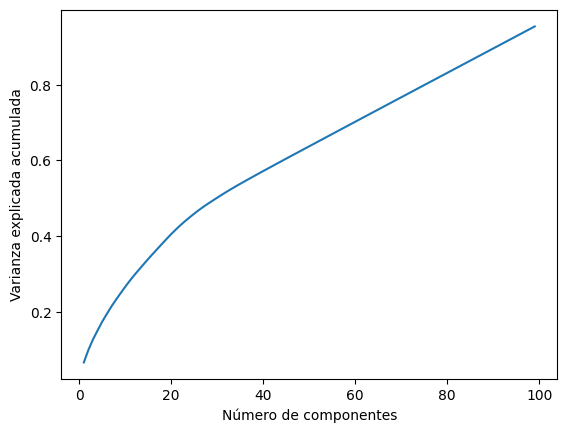

In [204]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum())
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.show()

Selección del modelo 

In [205]:
# Regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [206]:
#Modelo de Random Forest Regressor
random_forest_model = RandomForestRegressor(max_depth=10,n_estimators=50, random_state=42)  # revisar hiperparametros

Entrenamiento del modelo

In [207]:
# Entrenamos el Modelo de Regresión Lineal                                          
model.fit(X_train_pca, y_train)

LinearRegression()

In [208]:
# Entrenamos el Modelo de Random Forest Regressor
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

Predecciones de los Modelos

In [209]:
# Predecimos la regresión Lineal
y_pred = model.predict(X_test_pca)

In [210]:
# Predicimos Random Forest
y_pred_rf = random_forest_model.predict(X_test)

Optimización de Hipermarámetros del Modelo Random Forest Regressor:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [10, 20, 30], 'n_estimators': [50, 100, 200]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Se definio un conjunto de valores posibles para los hiperparámetros max_depth (profundidad)y n_estimators (número de árboles), se uso GridSearchCV para explorar todas las combinaciones posibles de los valores. Se entrenó el modelo RandomForestRegressor con la valización cruzada 5 participnes para cada combinación. Obteniendo los mejores valores: 

max_depth = 10, la profundidad óptima para los árboles es 10.

n_estimators = 50, el número óptimo de árboles es 50. 

Finalmente se procedió a implementar estos hiperparámetros en el modelo.

Evaluación de los modelos

Validación Cruzada

In [212]:
# Definimos la validación cruzada 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [213]:
# Definir las funciones para las métricas
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Definir los scorers
scoring = {
    'R2': 'r2',
    'RMSE': make_scorer(rmse, greater_is_better=False),
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False)
}

In [214]:
# Validación cruzada para el modelo de Regresión Lineal
linear_scores = cross_validate(model, X, y, cv=kfold, scoring=scoring)

# Resultados para la regresión lineal
print(f"Linear Regression - R²: {np.mean(linear_scores['test_R2'])}")
print(f"Linear Regression - RMSE: {-np.mean(linear_scores['test_RMSE'])}")
print(f"Linear Regression - MAE: {-np.mean(linear_scores['test_MAE'])}")

Linear Regression - R²: 0.4816859642495287
Linear Regression - RMSE: 4825.490537717488
Linear Regression - MAE: 2982.077266048537


In [215]:
# Validación cruzada para el modelo de Random Forest
rf_scores = cross_validate(random_forest_model, X, y, cv=kfold, scoring=scoring)

# Resultados para Random Forest
print(f"Random Forest - R²: {np.mean(rf_scores['test_R2'])}")
print(f"Random Forest - RMSE: {-np.mean(rf_scores['test_RMSE'])}")
print(f"Random Forest - MAE: {-np.mean(rf_scores['test_MAE'])}")


Random Forest - R²: 0.9134532326521949
Random Forest - RMSE: 1915.2687523825032
Random Forest - MAE: 1220.092468219507


Metricas sin validación cruzada

In [216]:
# Evaluación para el modelo de Regresión Lineal
r2_linear = r2_score(y_test, y_pred)
rmse_linear = mean_squared_error(y_test, y_pred, squared=False)
mae_linear = mean_absolute_error(y_test, y_pred)

print(f"Regresión Lineal: R²: {r2_linear}, RMSE: {rmse_linear}, MAE: {mae_linear}")

# Evaluación para el modelo de Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest: R²: {r2_rf}, RMSE: {rmse_rf}, MAE: {mae_rf}")

Regresión Lineal: R²: 0.8874713065919909, RMSE: 2712.3656044175614, MAE: 1655.3512438884777
Random Forest: R²: 0.9506760152099888, RMSE: 1795.7491432615323, MAE: 1129.6314315745215


Visualización de los Resultados

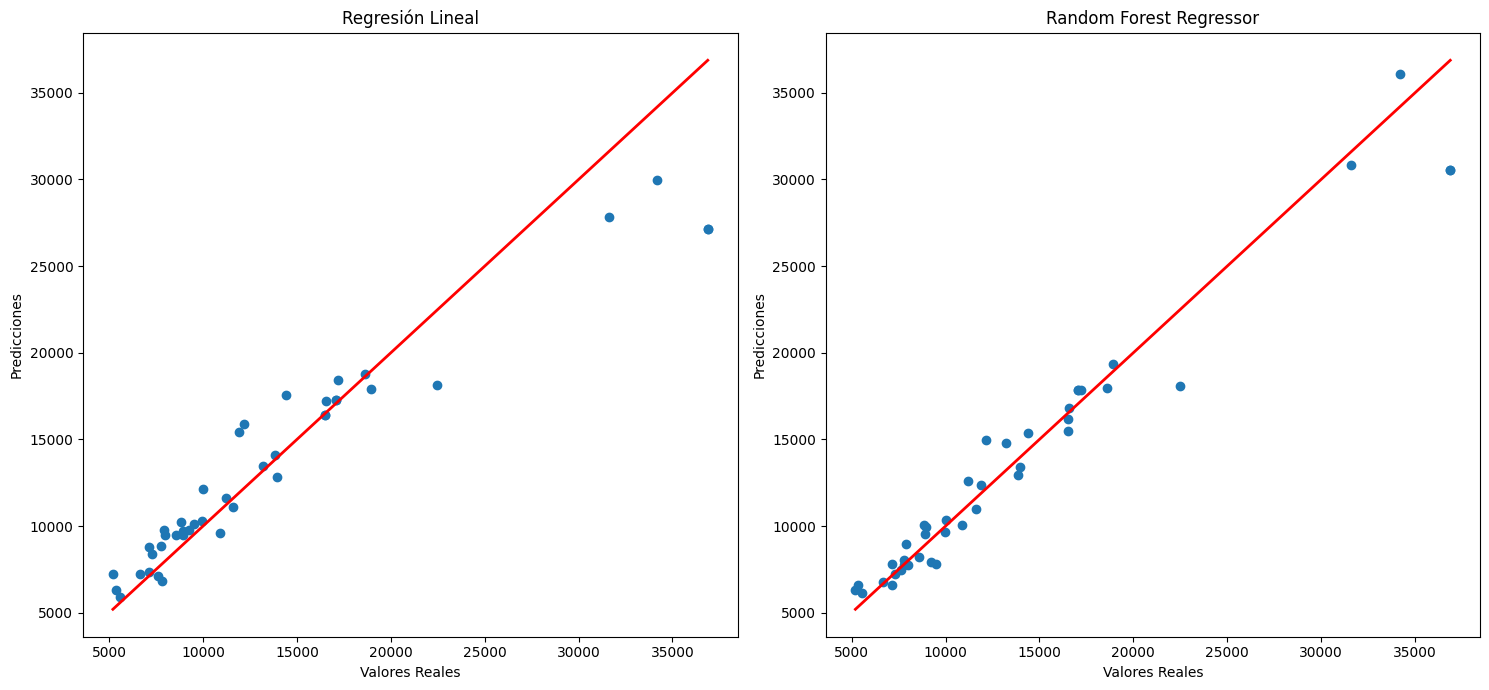

In [217]:
# Gráfico de valores reales vs predicciones
plt.style.use('default')
plt.figure(figsize=(15, 7))

# Valores reales vs Predicciones de Regresión Lineal
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Regresión Lineal')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Valores reales vs Predicciones de Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Random Forest Regressor')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

plt.tight_layout()
plt.show()

### Elección del Mejor Modelo de Regresión

**Sinvalidación Cruzada:**

- Regresión Lineal: R²: 0.8874713065919909, RMSE: 2712.3656044175614, MAE: 1655.3512438884777
- Random Forest: R²: 0.9506760152099888, RMSE: 1795.7491432615323, MAE: 1129.6314315745215

*R² (coeficiente de determinación):*

- En el modelo de regresión lineal se tiene un R² de 0.8874, lo que significa que el 88.74% de la variabilidad en los precios está explicada por el modelo. Obteniendo un buen ajuste.

- En el modelo Random Forest Regressor se tiene un R² de 0.9506, lo que significa que el 95.06% de la variabilidad en los precios está explicada por el modelo. Este ajuste es mejor que el modelo de regresión lineal; indicando que el modelo random forest Regressor captura de mejor manera las relaciones complejas entre las variables predictoras y la variable objetivo (precio).

*Error Cuadrático Medio (RMSE):*

- Para el modelo de regresión lineal, el RMSE es de 2712.36, lo que significa que en promedio, el modelo comete un error de aproximadamente 2712 unidades, o como en nuestro caso es precio estariamos hablando de 2,712.36 dolares al predecir los valores.

- Para el modelo random forests regressor, el RMSE es de 1795.75, lo que indica que el modelo comete un error de promedio de 1,795.75 dolares, que es significativamente menor que el error del modelo de regresión lineal.

*Error Absoluto Medio (MAE):*
 - El MAE de 1655.35 para el modelo de regresión lineal, nos indica que el error promedio absoluto entre las predicciones y los valores reales es de aproximadamente 1,655.35 dolares.
 - El MAE de 1129.63 para el modelo de random forest regressor, nos indica un error promedio absoluto de 1129.63 unidades, observandose que el modelo comete errores más pequeños en promedio que el modelo de regresión lineal.

Por tanto, basándonos en estos resultados, el modelo Random Forest supera claramente al modelo de Regresión Lineal en todas las métricas evaluadas. Lo que nos indica que el modelo Random Forest es mejor en capturar la complejidad de los datos y hacer predicciones más precisas. 

**Con valiación Cruzada:**

**Regresión Lineal:**
El R² es 0.4817, lo que significa que la Regresión Lineal explica alrededor del 48% de la variabilidad de los datos en los conjuntos de validación, el cual nos estaría indicando que el modelo no está capturando bien la estructura del conjunto de datos y tiene un bajo poder predictivo. en cuanto al RMSE = 4825.49 alto y un MAE=2982.08 también alto.
Por tanto, podemos decir que el modelo de regresión lineal con validadción cruzada muestra un rendimiento deficiente, indicandonos que el modelo no generaliza bien con nuevos datos, lo que sugiere que el modelo podría estar ajustándose demasiado a los datos de entrenamiento.

**RandomForest Regressor:**
El R²es 0.9135, indicándonos que el modelo Random Forest tiene un excelente ajuste a los datos, explicando el 91.35% de la variabilidad en los datos de validación, es decir, el modelo puede captar mejor las relaciones no lineales en los datos. Así también el RMSE= 1915.27 y MAE= 1220.09, son más bajos que los de la regresión lineal, lo que nos indica una mayor precisión en la predicciones.
En ese sentido, el modleo Random Forest Regressor, muestra una buena generalización incluson con valudación cruzada, pues logra un mejor equilibrio entre precisisón y generalicación.

### Recomendación:
En base al análisis realizado, el modelo Random Forest es un modelo mucho más adecuado para nuestros datos, ya que presenta mejores métricas que lo convierte en un modelo mucho más robusto para nuestros datos.

# 2. Modelo de clasificación:


Mediante el aprendizaje supervisado se busca obtener un modelo de clasificación para los vehículos de gama alta o gama baja, teniendo a la mediana de los precios como punto de corte, utilizando los datos ya preparados en el EDA_cars.

## 2.1 Regresión Logística:

Separen el dataset en X(características), y (variable objetivo)

In [218]:
X = df1.drop(['gama', 'price'],axis=1)
y = df1['gama']

In [219]:
X

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,Marca_Audi,Marca_BMW,Marca_Buick,Marca_Chevrolet,Marca_Dodge,Marca_Honda,Marca_Isuzu,Marca_Jaguar,Marca_Mazda,Marca_Mitsubishi,Marca_Nissan,Marca_Peugeot,Marca_Plymouth,Marca_Renault,Marca_Saab,Marca_Subaru,Marca_Toyota,Marca_Volkswagen,Marca_Volvo,Modelo_100ls,Modelo_1131 deluxe sedan,Modelo_12tl,Modelo_144ea,Modelo_145e (sw),Modelo_244dl,Modelo_245,Modelo_246,Modelo_304,Modelo_4000,Modelo_411 (sw),Modelo_5 gtl,Modelo_5000,Modelo_504,Modelo_504 (sw),Modelo_505s turbo diesel,Modelo_604sl,Modelo_626,Modelo_99e,Modelo_99gle,Modelo_99le,Modelo_D-Max,Modelo_D-Max V-Cross,Modelo_MU-X,...,Modelo_rampage,Modelo_regal sport coupe (turbo),Modelo_rogue,Modelo_rx-4,Modelo_rx-7 gs,Modelo_rx2 coupe,Modelo_rx3,Modelo_satellite custom (sw),Modelo_skyhawk,Modelo_skylark,Modelo_starlet,Modelo_stelvio,Modelo_super beetle,Modelo_teana,Modelo_tercel,Modelo_titan,Modelo_trezia,Modelo_tribeca,Modelo_type 3,Modelo_valiant,Modelo_vega 2300,Modelo_versa,Modelo_x3,Modelo_xf,Modelo_z4,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.4,141.1,60.3,1488,61,2.91,48,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,94.5,155.9,63.6,1874,90,3.03,70,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,94.5,158.8,63.6,1909,90,3.03,70,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,93.7,157.3,63.8,1876,90,2.97,68,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,93.7,157.3,63.8,1876,90,2.97,68,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,102.4,175.6,66.5,2414,122,3.31,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
202,107.9,186.7,68.4,3020,120,3.46,97,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
203,113.0,199.6,69.6,4066,258,3.63,176,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
204,95.3,169.0,65.7,2380,70,3.33,101,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [220]:
y

0      0
1      0
2      0
3      0
4      0
      ..
201    1
202    1
203    1
204    1
205    1
Name: gama, Length: 206, dtype: int64

Dividimos los datos en entrenamiento y prueba

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Estandarizamos los datos

In [222]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Escalar los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Usar la transformación ajustada en los datos de prueba

In [223]:
# cargamos los datos y los estandarizamos

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [224]:
np.shape(X)

(206, 172)

In [225]:
np.shape(X_scaled)

(206, 172)

Aplicamos PCA (Análisis de componentes principales) para reducir la dimensionalidad

In [226]:
pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)  # Ajustar y transformar los datos de entrenamiento
X_test_pca = pca.transform(X_test_scaled)  # Transformar los datos de prueba


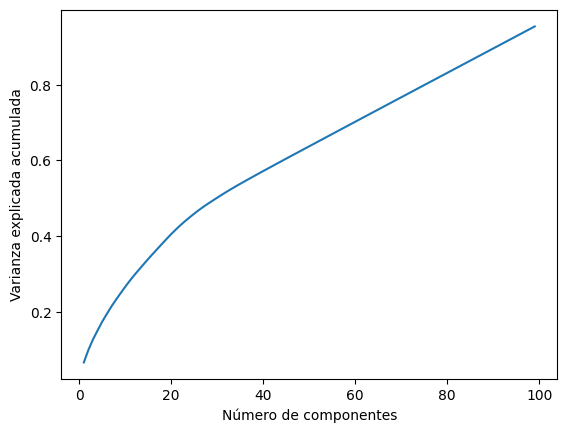

In [227]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum())
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.show()

Entrenamos el modelo de regresión logística

In [228]:
model = LogisticRegression()

In [229]:
model.fit(X_train_pca, y_train)  # Entrenar con los datos reducidos

LogisticRegression()

Predecirmos con el modelo

In [230]:
y_pred = model.predict(X_test_pca)

In [231]:
y_prob = model.predict_proba(X_test_pca)[:, 1]  # Probabilidades para el cálculo del ROC-AUC

Evaluamos el modelo

Métricas sin Validación Cruzada

In [232]:

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9523809523809523
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.95      0.95      0.95        22

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42



*Para la clase 0:*

- Precision: 0.95 (o 95%) De todas las instancias que el modelo predijo como clase 0, el 95% eran realmente clase 0. 

- Recall: 0.95 (o 95%) De todas las instancias que eran realmente clase 0, el modelo identificó correctamente el 95%. 

- F1-score: 0.95 Es la media armónica entre precision y recall, proporcionando un balance entre ambas métricas. Un valor de 0.95 indica un buen equilibrio entre la precisión y el recall para la clase 0.

*Para la clase 1:*

- Precision: 0.95 (o 95%) De todas las instancias que el modelo predijo como clase 1, el 95% eran realmente clase 1.

- Recall: 0.95 (o 95%) De todas las instancias que eran realmente clase 1, el modelo identificó correctamente el 95%.

- F1-score: 0.95 Indica un buen equilibrio entre precisión y recall para la clase 1.

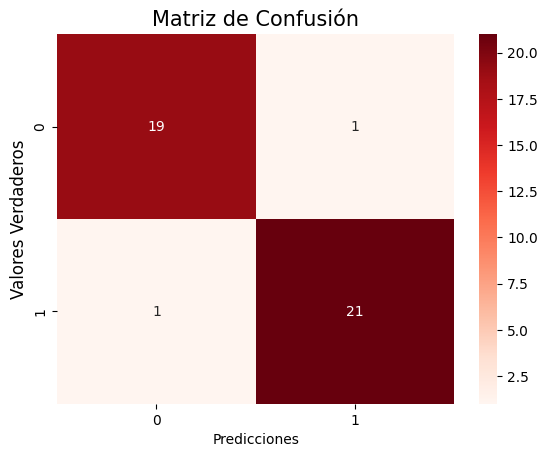

In [233]:
confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos', fontsize=12)
plt.title('Matriz de Confusión', fontsize=15)
plt.show()

(0,0) = 19: Verdaderos negativos (TN) → El modelo predijo clase 0 (baja gama) correctamente 19 veces.

(0,1) = 1: Falsos positivos (FP) → El modelo predijo clase 1 (alta gama) incorrectamente 1 ves, cuando en realidad eran clase 0.

(1,0) = 1: Falsos negativos (FN) → El modelo predijo clase 0 (baja gama) incorrectamente 1 ves, cuando en realidad eran clase 1.

(1,1) = 21: Verdaderos positivos (TP) → El modelo predijo clase 1 (alta gama) correctamente 21 veces.

Evaluación de la matriz de confusión:

Verdaderos positivos (TP = 21): El modelo predijo correctamente la clase 1, lo que significa que 21 de las instancias de alta gama fueron correctamente clasificadas.

Verdaderos negativos (TN = 19): El modelo identificó correctamente 19 instancias de baja gama como clase 0.

Falsos positivos (FP = 1): El modelo clasificó 1 instancia como de clase 1 (alta gama) cuando en realidad eran de clase 0 (baja gama). Esto representa un error, en el que el modelo "sobreestima" la probabilidad de que algo sea de alta gama.

Falsos negativos (FN = 1): El modelo clasificó incorrectamente 1 instancia de clase 1 (alta gama) como clase 0 (baja gama). Estos son errores donde el modelo "subestima" las instancias de alta gama.

AUC: 0.9636363636363635


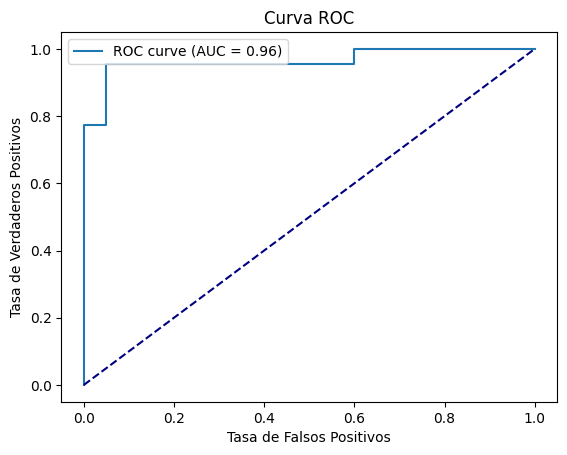

In [234]:
# Calcular los puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc}')

# Visualizar la curva ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'navy', linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

Un AUC de 0.9636 significa que el modelo es capaz de distinguir entre las clases con un 96.36% de probabilidad. En otras palabras, si seleccionas una instancia de clase 0 y una de clase 1 al azar, hay un 96.36% de probabilidad de que el modelo clasifique correctamente la instancia positiva (alta gama) con una probabilidad más alta que la instancia negativa (baja gama).
Este valor está muy cerca de 1, lo que sugiere que modelo de regresión logística tiene un excelente rendimiento en términos de clasificación y está separando muy bien las clases 0 y 1.

Validación cruzada

In [235]:
k=5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [236]:
# Realizar validación cruzada usando la métrica de precisión
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
# Realizar validación cruzada usando la métrica de F1-score
scores_f1 = cross_val_score(model, X, y, cv=kf, scoring='f1')

In [237]:
# Promediar los resultados de los k-folds
mean_score = scores.mean()
std_score = scores.std()
print(f'Precisión media con validación cruzada de {k} folds: {mean_score}')
print(f'Desviación estándar de la precisión: {std_score}')

mean_f1 = scores_f1.mean()
print(f'F1-score medio con validación cruzada: {mean_f1}')

Precisión media con validación cruzada de 5 folds: 0.902787456445993
Desviación estándar de la precisión: 0.03474550763015445
F1-score medio con validación cruzada: 0.9034881549519032


**Interpretación**:

- El modelo sin validación cruzada parece haber sobreestimado el rendimiento, ya que la precisión cayó de 0.95 a 0.90 con validación cruzada.

- La desviación estándar de 0.03 es relativamente baja, lo que indica que el modelo es consistente en las diferentes particiones de los datos.

- El F1-score medio (0.90) es igual a la precisión media (0.90), lo que podría sugerir que el modelo tiene un rendimiento igual entre las dos clases.

## 2.2 K vecinos más cercanos (KNN):

Cargamos los datos y definimos X e y

In [238]:
# Separar las variables explicativas y la variable objetivo
X = df1.drop(['gama', 'price'], axis=1)  # Variables explicativas
y = df1['gama']  # Variable objetivo

Dividimos los datos en entrenamiento y prueba

In [239]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Normalización de los datos

In [240]:
# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creamos el modelo 

In [241]:
# Crear el modelo KNN
k = 5 # Puedes cambiar este valor
knn = KNeighborsClassifier(n_neighbors=k)

Entrenamos el modelo con los datos de entrenamiento

In [242]:
# Ajustar el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

Hacemos predicciones con el modelo 

In [243]:
# Hacer predicciones
y_pred = knn.predict(X_test)

In [244]:
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidades para el cálculo del ROC-AUC

Evaluamos el modelo

Métricas sin valiadación cruzada

In [245]:

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy:.4f}")


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.91      0.95      0.93        22

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

Precisión: 0.9286


*Para la clase 0:*

- Precision: 0.95 (o 95%) De todas las instancias que el modelo predijo como clase 0, el 95% eran realmente clase 0. 

- Recall: 0.90 (o 90%) De todas las instancias que eran realmente clase 0, el modelo identificó correctamente el 90%. 

- F1-score: 0.92 Es la media armónica entre precision y recall, proporcionando un balance entre ambas métricas. Un valor de 0.92 indica un buen equilibrio entre la precisión y el recall para la clase 0.

*Para la clase 1:*

- Precision: 0.91 (o 95%) De todas las instancias que el modelo predijo como clase 1, el 91% eran realmente clase 1.

- Recall: 0.95 (o 95%) De todas las instancias que eran realmente clase 1, el modelo identificó correctamente el 95%.

- F1-score: 0.93 Indica un buen equilibrio entre precisión y recall para la clase 1.

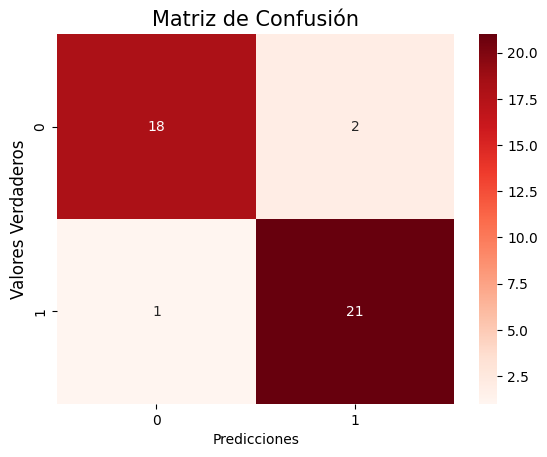

In [246]:
confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos', fontsize=12)
plt.title('Matriz de Confusión', fontsize=15)
plt.show()

(0,0) = 18: Verdaderos negativos (TN) → El modelo predijo clase 0 (baja gama) correctamente 18 veces.

(0,1) = 2: Falsos positivos (FP) → El modelo predijo clase 1 (alta gama) incorrectamente 2 veces, cuando en realidad eran clase 0.

(1,0) = 1: Falsos negativos (FN) → El modelo predijo clase 0 (baja gama) incorrectamente 1 ves, cuando en realidad eran clase 1.

(1,1) = 21: Verdaderos positivos (TP) → El modelo predijo clase 1 (alta gama) correctamente 21 veces.

Evaluación de la matriz de confusión:

Verdaderos positivos (TP = 21): El modelo predijo correctamente la clase 1, lo que significa que 21 de las instancias de alta gama fueron correctamente clasificadas.

Verdaderos negativos (TN = 18): El modelo identificó correctamente 18 instancias de baja gama como clase 0.

Falsos positivos (FP = 2): El modelo clasificó 2 instancias como de clase 1 (alta gama) cuando en realidad eran de clase 0 (baja gama). Esto representa un error, en el que el modelo "sobreestima" la probabilidad de que algo sea de alta gama.

Falsos negativos (FN = 1): El modelo clasificó incorrectamente 2 instancias de clase 1 (alta gama) como clase 0 (baja gama). Estos son errores donde el modelo "subestima" las instancias de alta gama.

AUC: 0.9443181818181818


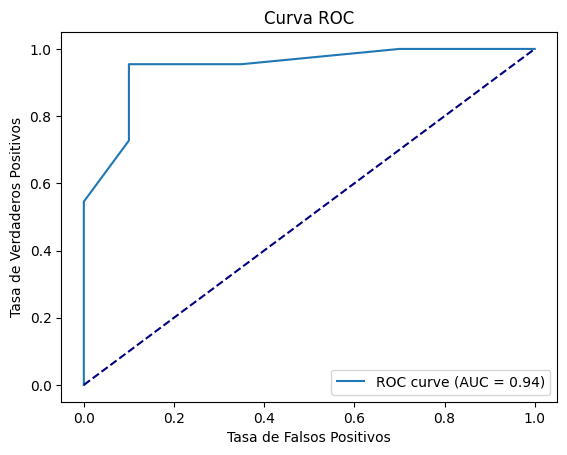

In [247]:
# Curva ROC
# Calcular los puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc}')

# Visualizar la curva ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color = 'navy', linestyle='--')  # Línea diagonal
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

Un AUC de 0.9443 significa que el modelo es capaz de distinguir entre las clases con un 96.36% de probabilidad. En otras palabras, si seleccionas una instancia de clase 0 y una de clase 1 al azar, hay un 94.43% de probabilidad de que el modelo clasifique correctamente la instancia positiva (alta gama) con una probabilidad más alta que la instancia negativa (baja gama).
Este valor está muy cerca de 1, lo que sugiere que el modelo KNN tiene un excelente rendimiento en términos de clasificación y está separando muy bien las clases 0 y 1.

Validación Cruzada

In [248]:
# Realizar la validación cruzada
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation

# Mostrar los resultados
print(f"Precisión media con validación cruzada: {cv_scores.mean():.4f}")
print(f"Desviación estándar de la precisión: {cv_scores.std():.4f}")

Precisión media con validación cruzada: 0.8710
Desviación estándar de la precisión: 0.0785


**Interpretación**:

La precisión media obtenida con valiación cruzada (87.10%) es significativamente más baja que la precisión sin ella (92.86%), lo que significa que el modelo puede funcionar bien con el conjunto de prueba, pero podría no generalizar bien con datos no vistos.

Optimización de Hipermarámetros

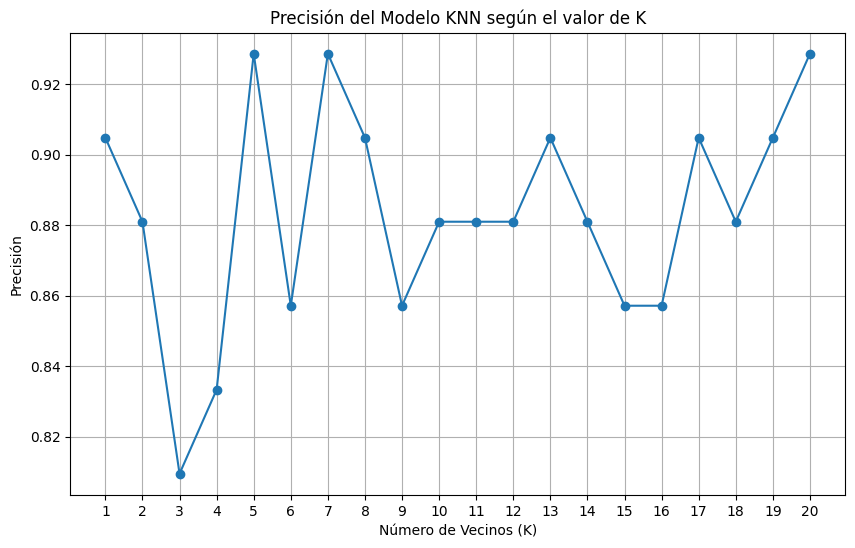

In [249]:
# Probar diferentes valores de K
import matplotlib.pyplot as plt

k_values = range(1, 21)  # Probar K de 1 a 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Graficar la precisión en función de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Precisión del Modelo KNN según el valor de K')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid()
plt.show()

Los valores óptimos para k de acuerdo al gráfico serían 5, 7 y 20, por ello, para el modelo KNN se ha optado por k=5.

### Elección del Mejor Modelo de Clasificación

Para determinar la elección del modelo de clasificación, se analizan las métricas evaluadas en ambos modelos: Regresión Logística y KNN.

En términos de precisión, la Regresión Logística presenta una precisión media de 0.9028, superior a la del modelo KNN, que es 0.8710. Esto indica un mejor rendimiento general de la Regresión Logística.

Además, la Regresión Logística muestra una desviación estándar de precisión más baja, con un valor de 0.0347 en comparación con 0.0785 para KNN. Esto sugiere que el modelo de Regresión Logística es más consistente en su rendimiento a través de diferentes subconjuntos de datos.

El F1-score de la Regresión Logística también es superior al de KNN, lo que significa que este modelo ofrece un mejor equilibrio entre precisión y recall.

Finalmente, el AUC de la Regresión Logística es más alto, alcanzando 0.9636, en comparación con 0.9443 para KNN. Esto indica que la Regresión Logística es más efectiva para distinguir entre las distintas clases.

### Recomendación:
Basado en el análisis realizado, se recomienda utilizar el modelo de Regresión Logística debido a su superioridad en las métricas evaluadas, lo que sugiere un mejor rendimiento en la clasificación de datos.